# Neuronale Netzwerke - Wiederholung
---

## Typen neuronaler Netzwerke

### 1. Fully-Connected Neural Networks (FCN)

Ein __FCN__ (oder neuronale Netzwerke im Allgemeinen) kann als Sequenz spezifischer Schichten beschrieben werden. Diese Schichten, entsprechend der Position als _input_-, _output_- und _hidden layer_ bezeichnet, sind Kollektionen von Neuronen (siehe Bild). 
<img src="Bilder/fnc.jpeg">
Jedes Neuron hat bei einem __FCN__ eine Verbindung zu allen vorhergehenden und nachfolgenden Neuronen. Alle eingehenden (und die entsprechend ausgehenden) Verknüpfungen können beschrieben werden wie in folgendem Bild:
<img src="Bilder/single_neuron.jpg">
Jede Verknüpfung hat ein kennzeichnendes Gewicht, welches dem entsprechenden Eingangssignal eine Wichtigkeit zuordnet. Diese Miniprodukte werden dann summiert und durch eine Aktivierungsfunktion $f$ geschickt.
Somit führt jedes Neuron eine mathematische Operation der Form

\begin{equation}
y = f\left( b + \sum_{i=1}^n w_ix_i \right)
\end{equation}

durch.

### 2. Convolutional Neural Networks (CNN)

Ein __CNN__ ist eine Sammlung verschiedener _Kernels_ oder _Filter_ - kleine "Pakete" mit Gewichten, welche über das Bild geschoben (_gefaltet_) werden. Ziel ist es, das jedes einzelne Paket Pixelgruppen identifiziert, z.B. kleine Ecken und Linien in der ersten Schicht und komplizierte, kombinierte Strukturen in den Folgeschichten. Dies lässt sich gut an einem generellen Aufbaubeispiel verdeutlichen, z.B. hier:
<img src="Bilder/cnn.png">

oder hier:

<img src="Bilder/cnn2.png">

---

Die _Kernel_ werden dabei entsprechenden folgendem Bild über das Bild geschoben um sog. __feature maps__ zu generieren; funktionale Bilder welche die Auftrittswahrscheinlichkeit eines vom entsprechenden _Kernel_ codierten _features_ (Eigenschaft) am entsprechenden Ort angeben:

<img src="Bilder/conv_pic_example.png">

Häufig auftretend in solchen Strukturen sind __Pooling Layer__ , welche die vorhergehenden _feature maps_ zusammenfassen um Platz zu speichern und das Training zu beschleunigen. Ein solches _Layer_ ist definiert durch eine _Kernelgröße_, welche wie bei normalen _CNN_-Schichten über das Bild geschoben werden und dabei entsprechende Zusammenfassungsoperation durchführen, z.B. das Maximum oder das arithmetische Mittel.

---

## Umsetzung in PyTorch

Um ein solches Netzwerk effektiv und vor allem einfach implementieren zu können, verwenden wir die __PyTorch__-Bibliothek (Installationsinformationen siehe vorheriges Tutorial).

Für ein _FCN_ sieht das beispielsweise so aus:

In [1]:
import torch.nn as nn
import torch
#torch.nn ist die Sammlung aller generellen Funktionen 
#eines neuronalen Netzwerkes, daher auch die Abküruzung nn.

# class FCN_Base(nn.Module):
#     def __init__(self):
#         super(FCN_Base,self).__init__()
#         self.fcn1 = nn.Linear(784,30)
#         self.fcn2 = nn.Linear(30,30)
#         self.fcn3 = nn.Linear(30,10)
#         self.akt_func = nn.Softmax(dim=1)
        
#     def forward(self,x):
#         x = F.relu(self.fcn1(x))
#         x = F.relu(self.fcn2(x))
#         x = self.akt_func(self.fcn3(x))
#         return x
    
#ODER

# FCN_Base_2 = torch.nn.Sequential(
#              torch.nn.Linear(784, 30), # Erste/Zweite Schicht: 784 Eingangsneuronen zu 30 "versteckten" Neuronen
#              torch.nn.ReLU(),          # Aktivierungsfunktion
#              torch.nn.Linear(30, 30),  # Zweite/Erste Schicht: 30 "versteckte" Neuronen gehen über zu 10 Ausgangsneuronen.
#              torch.nn.ReLU(),
#              torch.nn.Linear(30,10),
#              torch.nn.Softmax(dim=1)   # Ausgangsaktivierungsfunktion. Siehe vorheriges Tutorial.
#              )

#Sowie für CNNs:

class CNN_Base(nn.Module):
    def __init__(self):
        super(CNN_Base,self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=3)  # 26x26
        self.conv2 = nn.Conv2d(30, 50, kernel_size=3) # 24x24
        self.bn1 = nn.BatchNorm2d(50)
        self.conv3 = nn.Conv2d(50, 100, kernel_size=3,padding=1)  # 12x12
        self.conv4 = nn.Conv2d(100, 100, kernel_size=3,padding=1)  # 12x12
        self.bn2 = nn.BatchNorm2d(100)
        self.conv5 = nn.Conv2d(100, 150, kernel_size=3,padding=1) # 6x6        
        self.conv6 = nn.Conv2d(150, 50, kernel_size=3,padding=1)# 6x6                
        self.fc1 = nn.Linear(1800, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)
        self.dp1 = nn.Dropout2d(0.2)
        self.dp2 = nn.Dropout2d(0.2)
        
        self.out_act = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.leaky_relu(F.max_pool2d(self.bn1(self.conv2(self.conv1(x))), 2))
        x = self.dp1(x)
        x = F.leaky_relu(F.max_pool2d(self.bn2(self.conv4(self.conv3(x))), 2))
        x = self.dp2(x)
        x = F.leaky_relu(self.conv6(self.conv5(x)))
        x = x.view(-1, 1800)   #Hier ändern wir Bild- zu Vektorformat
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))        
        x = self.fc3(x)
        return self.out_act(x)

#ODER

# class CNN_Base_2(nn.Module):
#     def __init__(self):
#         self.conv_teil = nn.Sequential(
#                          nn.Conv2d(1,10,3),
#                          nn.Conv2d(10,20,3),
#                          nn.MaxPool2d(2),
#                          nn.ReLU(),
#                          nn.Conv2d(20,30,3),
#                          nn.Conv2d(30,30,3),
#                          nn.MaxPool2d(2),
#                          nn.ReLU(),
#                          nn.Conv2d(30,50,3),
#                          nn.Conv2d(50,50,3),
#                          nn.ReLU())
#         self.fcn_teil =  nn.Sequential(
#                          nn.Linear(1800,150),
#                          nn.ReLU(),
#                          nn.Linear(150,50),
#                          nn.ReLU(),
#                          nn.Linear(50,10),
#                          nn.Softmax(dim=1))
#     def forward(self,x):
#         x = self.conv_teil(x)
#         x = x.view(-1,1800)
#         x = self.fcn_teil(x)
#         return x

Für das allgemeine Training können wir das entsprechende Skript des letzten Tutorials verwenden:

### Generelle Funktionen:

In [2]:
import os, numpy as np
from torch.utils.data import DataLoader, Dataset
class MNIST_Data_Provider(Dataset):
    def __init__(self, all_image_paths, all_image_labels):
        super(MNIST_Data_Provider, self).__init__()

        self.all_image_paths, self.all_image_labels = all_image_paths, all_image_labels
        self.transform_to_torch_tensor = transforms.ToTensor()
        self.hot_list = np.eye(10).astype(int)     
        
    def one_hot(self, label):
        return self.hot_list[label]
    
    def __getitem__(self, idx):
        loaded_image    = Image.open(self.all_image_paths[idx])
        label_for_image = self.all_image_labels[idx]
        
        return self.transform_to_torch_tensor(loaded_image), label_for_image
    
    def __len__(self):
        return len(self.all_image_paths)
    

def get_image_paths(path_to_folder):
    all_image_paths = []
    all_labels      = []
    for numberpath in os.listdir(path_to_folder):
        if numberpath != ".DS_Store" and '_' not in numberpath:
            avail_img_paths = [x for x in os.listdir(path_to_folder+"/"+numberpath) if '._' not in x]
            all_image_paths.extend([path_to_folder+"/"+numberpath+"/"+x for x in avail_img_paths])
            all_labels.extend([int(numberpath) for _ in range(len(avail_img_paths))])
    return all_image_paths, all_labels  

### Trainings-Setup:

In [6]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms
from PIL import Image
import os
import sys


""" Graphikkarte benutzen? """
print('Graphikkarte vorhanden: {}'.format(torch.cuda.is_available()))
gk_nutzen   = True
gk_vorhanden= torch.cuda.is_available()



""" Hyperparameter """
batch_size = 64
n_epochs   = 5
learning_rate = 0.0002
train_validation_split = 0.8


if __name__=="__main__":
    """ Aufsetzen der Datengeneratoren """
    path_to_MNIST_dataset = "trainingSet"

    all_image_paths, all_image_labels = get_image_paths(path_to_MNIST_dataset)

    np.random.seed(1)
    np.random.shuffle(all_image_paths)
    np.random.seed(1)
    np.random.shuffle(all_image_labels)

    split_idx = int(len(all_image_paths)*train_validation_split)

    training_img_paths = all_image_paths[:split_idx]
    training_labels    = all_image_labels[:split_idx]
    train_dataset = MNIST_Data_Provider(training_img_paths, training_labels)
    train_datagen = DataLoader(train_dataset, batch_size=batch_size,drop_last=True, shuffle=True, num_workers=1)

    validation_img_paths = all_image_paths[split_idx:]
    validation_labels    = all_image_labels[split_idx:]
    val_dataset = MNIST_Data_Provider(validation_img_paths, validation_labels)
    val_datagen = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, shuffle=False, num_workers=1)



    """ Laden des Netzes, Aufsetzen des Optimierers"""
    Net = CNN_Base()
    #Net.load_state_dict(torch.load(_pfad_zum_speicherplatz_mit_namen))
    if gk_nutzen and gk_vorhanden:
        _ = Net.cuda()

    #Oder: FCN_Base, FCN_Base_2, CNN_Base_2
    optimizer = optim.Adam(Net.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer,gamma=0.2,step_size=10)


    """ Training & Validierung """
    best_val_score = 0
    data_coll = {"t_acc":[], "v_acc":[]}
    for epoch in range(n_epochs):
        print("Training in Epoch {}...".format(epoch))

        """ Hier startet das Training! """
        Net.train()

        train_avg_loss = 0
        train_avg_acc  = 0
        for idx, (img,label) in enumerate(train_datagen):
            img, label = Variable(img), Variable(label)

            if gk_nutzen and gk_vorhanden:
                img,label = img.cuda(), label.cuda()

            optimizer.zero_grad()
            ### Für FCNs
            #output = Net(img.view(batch_size,-1))
            output = Net(img)

            loss = F.cross_entropy(output, label)

            loss.backward()
            optimizer.step()

            correct_guesses = output.data.max(1)[1].eq(label.data).sum()

            train_avg_loss += loss.data[0]
            train_avg_acc  += correct_guesses

            if idx%100==0 and idx!=0:
                print("\t T-Progress: [{}/{}]".format(idx+1,len(train_datagen)))

        train_avg_loss = train_avg_loss*1./(batch_size*len(train_datagen))
        train_avg_acc  = train_avg_acc*1./(batch_size*len(train_datagen))

        data_coll["t_acc"].append(train_avg_acc)

        """ Hier startet die Validierung """
        Net.eval()

        val_avg_acc = 0

        for idx, (img,label) in enumerate(val_datagen):
            img, label = Variable(img), Variable(label)

            if gk_nutzen and gk_vorhanden:
                img, label = img.cuda(), label.cuda()

            #output = Net(img.view(batch_size,-1))
            output = Net(img)
            correct_guesses = output.data.max(1)[1].eq(label.data).sum()

            val_avg_acc  += correct_guesses

            if idx%100==0 and idx!=0:
                print("\t V-Progress: [{}/{}]".format(idx+1,len(val_datagen)))    

        val_avg_acc = val_avg_acc*1./(batch_size*len(val_datagen))
        data_coll["v_acc"].append(val_avg_acc)    
        if val_avg_acc>best_val_score:
            best_val_score=val_avg_acc

        print("Results: T-Loss {0:2.5f} | T-Acc {1:3.4f}% | V-Acc {2:3.4f}% | BVS: {3:3.4f}".format(train_avg_loss, train_avg_acc*100., val_avg_acc*100., best_val_score*100.))
    #torch.save(Net.state_dict(), _pfad_zum_speicherplatz_mit_namen)

Graphikkarte vorhanden: False
Training in Epoch 0...


BrokenPipeError: [Errno 32] Broken pipe

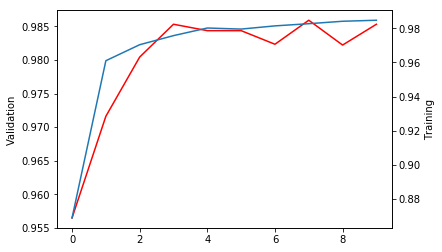

In [7]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1)
ax.plot(data_coll["v_acc"],'r')
ax.set_ylabel('Validation')
axx = ax.twinx()
axx.plot(data_coll["t_acc"])
axx.set_ylabel('Training')
plt.show()

In [9]:
torch.save(Net.state_dict(), os.getcwd()+'/Netzwerk_Gewichte')

----------------------------------------------

# Nacht der Forschung

### Einzelnes Bild vorhersagen

In [7]:
import os, numpy as np
from torch.utils.data import DataLoader, Dataset

import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.autograd import Variable
from torchvision import transforms

import torch.nn as nn
import torch

from PIL import Image
import os
import sys




####### PYTHON FUNKTIONEN UM DIE ZAHLBILDER ZU LADEN
class MNIST_Data_Provider(Dataset):
    def __init__(self, all_image_paths, all_image_labels):
        super(MNIST_Data_Provider, self).__init__()

        self.all_image_paths, self.all_image_labels = all_image_paths, all_image_labels
        self.transform_to_torch_tensor = transforms.ToTensor()
        self.hot_list = np.eye(10).astype(int)     
        
    def one_hot(self, label):
        return self.hot_list[label]
    
    def __getitem__(self, idx):
        loaded_image    = Image.open(self.all_image_paths[idx])
        label_for_image = self.all_image_labels[idx]
        
        return self.transform_to_torch_tensor(loaded_image), label_for_image
    
    def __len__(self):
        return len(self.all_image_paths)
    

def get_image_paths(path_to_folder):
    all_image_paths = []
    all_labels      = []
    for numberpath in os.listdir(path_to_folder):
        if numberpath != ".DS_Store" and '_' not in numberpath:
            avail_img_paths = [x for x in os.listdir(path_to_folder+"/"+numberpath) if '._' not in x]
            all_image_paths.extend([path_to_folder+"/"+numberpath+"/"+x for x in avail_img_paths])
            all_labels.extend([int(numberpath) for _ in range(len(avail_img_paths))])
    return all_image_paths, all_labels 




#################### AUFSETZEN DER DATEN-LADER
train_validation_split = 0.8


""" Aufsetzen der Datengeneratoren """
path_to_MNIST_dataset = "trainingSet"

all_image_paths, all_image_labels = get_image_paths(path_to_MNIST_dataset)

np.random.seed(1)
np.random.shuffle(all_image_paths)
np.random.seed(1)
np.random.shuffle(all_image_labels)

split_idx = int(len(all_image_paths)*train_validation_split)

training_img_paths = all_image_paths[:split_idx]
training_labels    = all_image_labels[:split_idx]
train_dataset = MNIST_Data_Provider(training_img_paths, training_labels)
train_datagen = DataLoader(train_dataset, batch_size=batch_size,drop_last=True, shuffle=True, num_workers=1)




############## NETZWERK LADEN
class CNN_Base(nn.Module):
    def __init__(self):
        super(CNN_Base,self).__init__()
        self.conv1 = nn.Conv2d(1, 30, kernel_size=3)  # 26x26
        self.conv2 = nn.Conv2d(30, 50, kernel_size=3) # 24x24
        self.bn1 = nn.BatchNorm2d(50)
        self.conv3 = nn.Conv2d(50, 100, kernel_size=3,padding=1)  # 12x12
        self.conv4 = nn.Conv2d(100, 100, kernel_size=3,padding=1)  # 12x12
        self.bn2 = nn.BatchNorm2d(100)
        self.conv5 = nn.Conv2d(100, 150, kernel_size=3,padding=1) # 6x6        
        self.conv6 = nn.Conv2d(150, 50, kernel_size=3,padding=1)# 6x6                
        self.fc1 = nn.Linear(1800, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 10)
        self.dp1 = nn.Dropout2d(0.2)
        self.dp2 = nn.Dropout2d(0.2)
        
        self.out_act = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.leaky_relu(F.max_pool2d(self.bn1(self.conv2(self.conv1(x))), 2))
        x = self.dp1(x)
        x = F.leaky_relu(F.max_pool2d(self.bn2(self.conv4(self.conv3(x))), 2))
        x = self.dp2(x)
        x = F.leaky_relu(self.conv6(self.conv5(x)))
        x = x.view(-1, 1800)   #Hier ändern wir Bild- zu Vektorformat
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))        
        x = self.fc3(x)
        return self.out_act(x)
    
######## NETZWERK AUFBAUEN UND MIT VORTRAINIERTEN GEWICHTEN VERSEHEN
Net = CNN_Base()
_ = Net.eval()
Net.load_state_dict(torch.load(os.getcwd()+'/Netzwerk_Gewichte'))


    
######## VORHERSAGE TREFFEN fuer ein einzelnes Bild
input_bild_batch, label_batch = next(iter(train_datagen))
idx = np.random.randint(len(label_batch))
input_bild = input_bild_batch[idx]
label      = label_batch[idx]
input_net  = Variable(input_bild)
prediction = Net(input_net.unsqueeze(1))
plt.figure(figsize=(5,5))
plt.imshow(input_bild.numpy()[0,:],cmap='gray')
plt.title('Wert: {} | Vorhersage: {}'.format(label, np.argmax(prediction.data.numpy())))
plt.show()

AttributeError: module 'torch._C' has no attribute '_cuda_getDevice'






---

Hier noch eine wichtige Erweiterung: Wenn die Gewichte des Netzwerk gespeichert werden sollen, um sie irgendwann nochmal wieder zu verwenden, bedient man sich einfach:

In [44]:
#torch.save(Net.state_dict(), _pfad_zum_speicherplatz_mit_namen)

Um ein Netzwerk mit den entsprechenden Gewichten auszustatten, verwendet man:

In [45]:
#Net.load_state_dict(torch.load(_pfad_zum_speicherplatz_mit_namen))

Wichtig: Die Netzwerkstruktur muss die Gleiche sein, um sie mit Gewichten ausstatten zu können.

---

## Einige neue extra Methoden

unter <http://pytorch.org/docs/master/nn.html#> finden sich viele weitere Möglichkeiten, die Performance des Netzwerkes zu verbessern.

### 1. Regularisierung

In [40]:
#optimizer = optim.Adam(Net.parameters(), lr=learning_rate, weight_decay=1e-5)

### 2. Dropout

In [41]:
#dropout_layer = nn.Dropout(0.2)

### 3. Optimierungsalgorithmen

In [ ]:
#optim.Adam(), optim.SGD(momentum=0.9), optim.Adadelta, optim.RMSprop, optim.Adamax

### 4. Batch-Normalisierung

In [ ]:
#bn = nn.BatchNorm2d(filter_in_next_layer)

### 5. Aktivierungsfunktionen

In [42]:
#nn.ReLU, F.relu(), F.leaky_relu(), ...

### 6. Hyperparameter-Optimmierung

In [43]:
#Learning rate, batchsize, usw.

---

## Aufgabe

Das Ziel des ganzen Tages ist es, mindestens 3/4 verschiedene Netzwerkstrukturen zu trainieren, Trainings- und Validierungskurven zu speichern und zu vergleichen.